 # Build the Neural Network

 `torch.nn` provides the building blocks to build the neural nets. Every module in PyTorch subclasses the `nn.Module`, a neural network is a module itself that consists of other modules (layers), the nested structure allows efficient building and managing of complex architectures.

In [1]:
# import required libraries
import torch
from torch import nn
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# get device for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


In [3]:
# define the neural network class
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        computed_logits = self.linear_relu_stack(x)

        return computed_logits

In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Calling the model on the input returns a $2$-dimensional tensor with $dim=0$ (row) corresponding to each output of $10$ raw predicted values for each class, and $dim=1$ (column) corresponding to the individual values of each output. The prediction probabilities are computed by the `nn.Softmax` module.

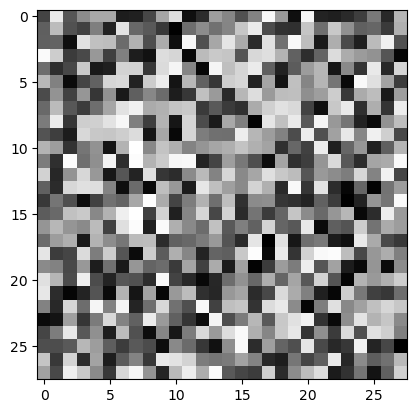

In [5]:
X = torch.rand(1, 28, 28, device=device)
plt.imshow(X.cpu().squeeze(0), cmap='gray')

In [6]:
out = model(X)
predicted_probabilities = nn.Softmax(dim=1)(out)
print(f'Predicted probabilities: {predicted_probabilities}')

Predicted probabilities: tensor([[0.1105, 0.0959, 0.1084, 0.0997, 0.1001, 0.1012, 0.1026, 0.0968, 0.0909,
         0.0939]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


In [7]:
y_pred = predicted_probabilities.argmax(1)
print(f'Predicted class: {y_pred}')

Predicted class: tensor([0], device='cuda:0')


## Model Layers

To analyze the model layers, let's take a sample minibatch of $3$ images of $28 \times 28$ and see what happens when we pass it through the network.

Text(0.5, 0.22, 'Minibatch Images')

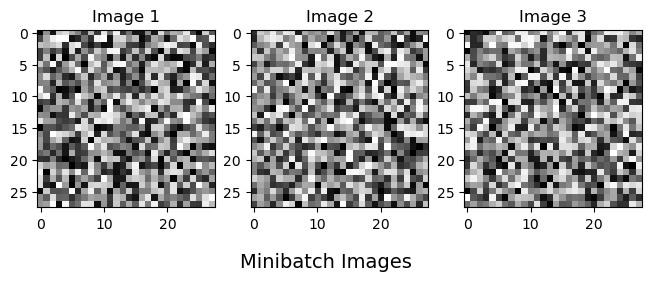

In [8]:
minibatch = torch.rand(3, 28, 28)
fig, axs = plt.subplots(1, 3, constrained_layout=True)
axs[0].imshow(minibatch[0], cmap='gray')
axs[0].set_title('Image 1')
axs[1].imshow(minibatch[1], cmap='gray')
axs[1].set_title('Image 2')
axs[2].imshow(minibatch[2], cmap='gray')
axs[2].set_title('Image 3')
fig.suptitle('Minibatch Images', y=0.22, size=14)

`nn.Flatten`

The `nn.Flatten` layer converts each 2D $28 \times 28$ image into a contiguous array of $784$ pixel values (the minibatch dimension `dim[0] = 3` is maintained).

In [19]:
flatten = nn.Flatten()
flattened_batch = flatten(minibatch)
print(flattened_batch.size())

torch.Size([3, 784])


`nn.Linear`

The `linear` layer applies a linear transform on the input with its stored weights and biases.

In [10]:
layer1 = nn.Linear(in_features = 28 * 28, out_features = 20)
hidden1 = layer1(flattened_batch)
print(hidden1.size())

torch.Size([3, 20])


`nn.ReLU`

Non-linear activations creates complex mapping between the model's inputs and outputs by introducing *non-linearity*, helping the network adapt to a wider set of phenomena.

In [11]:
print(f'Before ReLU: {hidden1} \n\n')
hidden1 = nn.ReLU()(hidden1)
print(f'After ReLU: {hidden1}')
print(f'Hidden layer shape: {hidden1.shape}')

Before ReLU: tensor([[ 0.1325,  0.0087,  0.4762,  0.4481, -0.8883,  0.0636, -0.3986, -0.3359,
          0.2774, -0.2160, -0.1789, -0.3252,  0.1586,  0.1297, -0.0532,  0.6374,
         -0.1971, -0.2206, -0.0735,  0.6465],
        [ 0.3389,  0.2533,  0.1792,  0.3968, -0.7626,  0.1158, -0.3960, -0.1332,
          0.0465, -0.0609, -0.3096, -0.1458, -0.0916,  0.2653, -0.0927,  0.6651,
         -0.0929, -0.4306, -0.0556,  0.6054],
        [-0.0791,  0.1110, -0.0530,  0.5991, -0.3223, -0.2937, -0.3263, -0.2986,
          0.1958, -0.1455, -0.3726, -0.2321, -0.1065,  0.4259, -0.3127,  0.5245,
         -0.1954, -0.0603,  0.3072,  0.4461]], grad_fn=<AddmmBackward0>) 


After ReLU: tensor([[0.1325, 0.0087, 0.4762, 0.4481, 0.0000, 0.0636, 0.0000, 0.0000, 0.2774,
         0.0000, 0.0000, 0.0000, 0.1586, 0.1297, 0.0000, 0.6374, 0.0000, 0.0000,
         0.0000, 0.6465],
        [0.3389, 0.2533, 0.1792, 0.3968, 0.0000, 0.1158, 0.0000, 0.0000, 0.0465,
         0.0000, 0.0000, 0.0000, 0.0000, 0.2653, 0.0

`nn.Sequential`

`nn.Sequential` is an ordered container of modules, the data flows through all the modules sequentially in the order as defined.

In [12]:
sequential_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)

In [13]:
minibatch = torch.rand(3, 28, 28)
logits = sequential_modules(minibatch)

In [14]:
print(f'logits: {logits}')
print(f'logits shape: {logits.shape}')

logits: tensor([[-0.3043,  0.2399,  0.0040,  0.1304,  0.0184, -0.1174, -0.1611, -0.2734,
          0.1782, -0.2738],
        [-0.3734,  0.2654, -0.0410,  0.1821, -0.0911, -0.1210, -0.0482, -0.2830,
          0.0872, -0.2951],
        [-0.3492,  0.2581,  0.0821, -0.0250, -0.2045, -0.1928,  0.0713, -0.2759,
          0.2224, -0.3095]], grad_fn=<AddmmBackward0>)
logits shape: torch.Size([3, 10])


`nn.Softmax`

The logits, raw values in $[-\infty, \infty]$, are scaled into values in $[0., 1.]$ representing the model's predicted probabilities for each class, `dim` parameter specifies the dimension along which the values must sum to $1$.

In [15]:
softmax = nn.Softmax(dim=1)
predicted_probabilities = softmax(logits)

In [16]:
print(f'Shape of predicted probabilities: {predicted_probabilities}')

Shape of predicted probabilities: tensor([[0.0766, 0.1320, 0.1043, 0.1183, 0.1058, 0.0924, 0.0884, 0.0790, 0.1241,
         0.0790],
        [0.0725, 0.1374, 0.1011, 0.1264, 0.0962, 0.0933, 0.1004, 0.0794, 0.1149,
         0.0784],
        [0.0741, 0.1360, 0.1141, 0.1025, 0.0857, 0.0867, 0.1129, 0.0798, 0.1313,
         0.0771]], grad_fn=<SoftmaxBackward0>)


## Model Parameters

In [17]:
print(f'Model structure: {model}')

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [18]:
for name, param in model.named_parameters():
    print(f'Layer: {name} | Size: {param.size()} | Values: {param[:2]} \n')

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[-0.0080, -0.0269, -0.0231,  ...,  0.0244, -0.0049,  0.0246],
        [ 0.0246,  0.0316, -0.0017,  ..., -0.0043,  0.0032,  0.0040]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([-0.0058,  0.0113], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[ 0.0128, -0.0054, -0.0115,  ...,  0.0186,  0.0295, -0.0232],
        [-0.0326,  0.0289,  0.0100,  ...,  0.0417,  0.0329, -0.0170]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([512]) | Values: tensor([-0.0260, -0.0288], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.4.weight | Size: torch.Size([10, 512]) | Values: tensor([[-0.0196, -0.0392, -0.0117,  ..., -0.0080, -0.0281, -0.0064],
        [-0.0426, -0.0360, -0.0369,  ...